In [1]:
from ast import literal_eval
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sys

sys.path.append("../../..")
from data_loading import *
from plotting import y1h_pdi_per_tf_gene_plot, m1h_activation_per_tf_gene_plot, COLOR_PURPLE
from data_loading import load_annotated_TFiso1_collection, load_y1h_pdi_data

## functions

In [2]:
def vals_per_bait(row, kfit_vs, colname, alt_suffix, ascending):
    
    kmers = []
    seq = row.seq
    seq_len = row.seq_len
    for i in range(0, seq_len-8):
        kmer = seq[i:i+8]
        kmers.append(kmer)
        
    sub = kfit_vs[kfit_vs["seq"].isin(kmers)]
    sub["abs"] = np.abs(sub[colname])
    sub = sub.sort_values(by="abs", ascending=ascending)
    largest_kmer = sub["seq"].iloc[0]
    largest_val = sub[colname].iloc[0]
    xval = sub["affinityEstimate_ref"].iloc[0]
    yval = sub["affinityEstimate_%s" % alt_suffix].iloc[0]
    
    rgb = sub["%s_rgb" % colname].iloc[0]
    return "%s_%s_%s_%s_%s" % (largest_kmer, largest_val, xval, yval, rgb)

In [3]:
def get_rgb(row, colname, m):
    x = row[colname]
    rgb = m.to_rgba(x)
    return rgb

In [4]:
from matplotlib import pyplot as plt
from matplotlib import patches

PAPER_PRESET = {"style": "ticks", "font": "Helvetica", "context": "paper", 
                "rc": {"font.size":10,"axes.titlesize":10,
                       "axes.labelsize":10, 'axes.linewidth':0.5,
                       "legend.fontsize":10, "xtick.labelsize":10,
                       "ytick.labelsize":10, "xtick.major.size": 3.0,
                       "ytick.major.size": 3.0, "axes.edgecolor": "black",
                       "xtick.major.pad": 3.0, "ytick.major.pad": 3.0}}
PAPER_FONTSIZE = 10

sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

## 1. import baits and y1h results

In [5]:
tfs = load_annotated_TFiso1_collection()

reading from cache


In [6]:
y1h_baits_f = "../../../../data/internal/Y1H_DNA_baits.fa"

In [7]:
ids = []
seqs = []

for record in SeqIO.parse(y1h_baits_f, "fasta"):
    ids.append(record.description)
    seqs.append(str(record.seq))
    
dna = pd.DataFrame()
dna["id"] = ids
dna["seq"] = seqs
dna["seq_len"] = dna.seq.str.len()
dna["id_upper"] = dna["id"].str.upper()
dna

,id,seq,seq_len,id_upper
0,hs1006,TAGTGGTGAACAACCACCATTGCTGCATCACGGAGTTTAAGTTCTC...,1493,HS1006
1,hs101,CCTCATACCTCCAAAGCCTCCAAGGCATTCCATGGAGCCATAATTG...,1329,HS101
2,hs1022,CAAAGCTGGCTAAAACCATGTCTGGAAAGCTGACAAATTTCCAGGT...,1378,HS1022
3,hs1030,GCAGAATTGCAACAAGAATTTCTTCTGTATTATTTTTTCATAGATA...,1436,HS1030
4,hs1043,GAAGACCAGAAAACCAGAAAGGCGAGGAGCGGCGGACGCTGACCCT...,1191,HS1043
...,...,...,...,...
454,MUT_91,GGAACATAGTTGGATGAGGAATTAATTAGATGGAAGGGAGATTTTG...,61,MUT_91
455,MUT_92,ACCCTCTGTAAACACTCAATGTGTTCTCACCTTGTTATCATTCCCA...,61,MUT_92
456,MUT_93,CTACTGAGCCATGAAAAAGAACAAGCCAAATGGATGGTCCAAAATG...,61,MUT_93
457,MUT_98,CCTTGAGGATGAAAGACAGGTACAGAGGCATGAATGCTTGTACCTG...,61,MUT_98


In [8]:
y1h = load_y1h_pdi_data(add_missing_data=True)
y1h

,tf,unique_acc,HS1006,HS1022,HS1043,HS1067,HS1139,HS1142,HS118,HS1181,...,KITLG,LTA,PF4V1,TNFSF10,TNFSF13,TNFSF14,TNFSF4,TNFSF8,XCL1,XCL2
183,AEBP2,AEBP2|2/3|05F03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
184,AEBP2,AEBP2|3/3|05E07,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
185,ARNT2,ARNT2|1/6|08C12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
186,ARNT2,ARNT2|2/6|09E01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
187,ARNT2,ARNT2|3/6|10D11,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,ZSCAN32,ZSCAN32|1/5|05B06,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
758,ZSCAN32,ZSCAN32|2/5|05F05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
759,ZSCAN32,ZSCAN32|4/5|05H04,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
760,ZSCAN9,ZSCAN9|1/3|11H08,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## TBX5

In [9]:
kfit_dat = pd.read_table("../../../../data/processed/pbms/TBX5kfit_dat.csv", sep=",")
da_dat = pd.read_table("../../../../data/processed/pbms/TBX5da_dat.csv", sep=",")

In [10]:
kfit_ref = kfit_dat[kfit_dat["cname"] == "TBX5C05-REF"]
kfit_3 = kfit_dat[kfit_dat["cname"] == "TBX5A05"]
kfit_2 = kfit_dat[kfit_dat["cname"] == "TBX5B05"]

In [11]:
kfit_vs = kfit_ref.merge(kfit_2, on=["seq"], suffixes=("_ref", ""))
kfit_vs = kfit_vs.merge(kfit_3, on=["seq"], suffixes=("_iso2", "_iso3"))
kfit_vs.head()

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,contrastAverage_iso2,contrastVariance_iso2,contains_any_motif_iso2,cname_iso3,affinityEstimate_iso3,affinityVariance_iso3,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3
0,AAAAAAAA,TBX5C05-REF,10.028611,0.004803,NaN,NaN,NaN,other k-mer,TBX5B05,9.903240,...,9.965926,0.003227,other k-mer,TBX5A05,9.931881,0.003412,-0.096730,9.980246,0.003536,other k-mer
1,AAAAAAAC,TBX5C05-REF,9.956585,0.001912,NaN,NaN,NaN,other k-mer,TBX5B05,9.934673,...,9.945629,0.005728,other k-mer,TBX5A05,9.957827,0.003953,0.001242,9.957206,0.003823,other k-mer
2,AAAAAAAG,TBX5C05-REF,10.115281,0.008088,NaN,NaN,NaN,other k-mer,TBX5B05,10.040526,...,10.077904,0.004583,other k-mer,TBX5A05,9.936246,0.004633,-0.179034,10.025764,0.005549,other k-mer
3,AAAAAAAT,TBX5C05-REF,10.020661,0.004480,NaN,NaN,NaN,other k-mer,TBX5B05,9.994817,...,10.007739,0.003959,other k-mer,TBX5A05,9.973363,0.002724,-0.047297,9.997012,0.004635,other k-mer
4,AAAAAACA,TBX5C05-REF,10.005205,0.005584,NaN,NaN,NaN,other k-mer,TBX5B05,9.981221,...,9.993213,0.004405,other k-mer,TBX5A05,9.912703,0.003827,-0.092501,9.958954,0.004838,other k-mer


In [12]:
da_3 = da_dat[da_dat["cname"] == "TBX5A05"]
da_2 = da_dat[da_dat["cname"] == "TBX5B05"]

In [13]:
kfit_vs = kfit_vs.merge(da_2[["seq", "contrastQ", "contrastQ_cut"]], on="seq")
kfit_vs = kfit_vs.merge(da_3[["seq", "contrastQ", "contrastQ_cut"]], on="seq", suffixes=("_iso2", "_iso3"))

In [14]:
kfit_vs.contains_any_motif_ref.value_counts()

other k-mer     32848
* TBX5 k-mer       48
Name: contains_any_motif_ref, dtype: int64

In [15]:
## define the other non TBX5 canonical k-mers
def define_other_kmers(row):
    if row.contains_any_motif_ref == "* TBX5 k-mer":
        return row.contains_any_motif_ref
    elif "ACGTGT" in row.seq or "ACACGT" in row.seq:
        return "* ACGTGT k-mer"
    else:
        return "other k-mer"

kfit_vs["contains_any_motif"] = kfit_vs.apply(define_other_kmers, axis=1)
kfit_vs.contains_any_motif.value_counts()

other k-mer       32800
* TBX5 k-mer         48
* ACGTGT k-mer       48
Name: contains_any_motif, dtype: int64

In [16]:
kfit_vs.affinityEstimate_iso3.min()

9.46804367678806

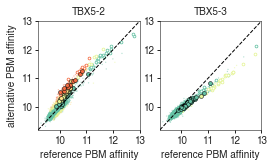

In [17]:
fig, axarr = plt.subplots(1, 2, figsize=(4, 2))

markers = [",", ".", "o"]
titles = ["TBX5-2", "TBX5-3"]

for i, suffix in enumerate(["iso2", "iso3"]):
    
    ax = axarr[i]

    for k, motif in enumerate(["other k-mer", "* TBX5 k-mer", "* ACGTGT k-mer"]):
        for j, qval in enumerate(["(0.1,1]", "(0.01,0.1]", "(0.001,0.01]", "[0,0.001]"]):
            
            sub = kfit_vs[(kfit_vs["contrastQ_cut_%s" % suffix] == qval) & 
                          (kfit_vs["contains_any_motif"] == motif)]
            xs = sub["affinityEstimate_ref"]
            ys = sub["affinityEstimate_%s" % suffix]
            
            color = sns.color_palette("Spectral_r", n_colors=4)[j]
            marker = markers[k]
            
            if marker == "o":
                ax.scatter(xs, ys, 15, marker=marker, edgecolors="black", facecolors=color, alpha=1, linewidth=0.5)
            elif marker == ",":
                ax.scatter(xs, ys, 1, marker=".", edgecolors=color, facecolors='none', alpha=0.5)
            else:
                ax.scatter(xs, ys, 30, marker=marker, edgecolors=color, facecolors='white', alpha=1)
                
    
    ax.set_xlim((9.2, 13))
    ax.set_ylim((9.2, 13))
    ax.plot([9.2, 13], [9.2, 13], color="black", linestyle="dashed", linewidth=1, zorder=1)
    ax.set_xticks([10, 11, 12, 13])
    ax.set_yticks([10, 11, 12, 13])
    ax.set_xlabel("reference PBM affinity")
    ax.set_title(titles[i])
    
axarr[0].set_ylabel("alternative PBM affinity")
fig.savefig("../../../../figures/TBX5_isoforms_pbm_scatter.pdf", dpi="figure", bbox_inches="tight")

In [18]:
# add colors to kfit_vs
cmap_name = "Spectral"
colname = "contrastDifference_iso2"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[colname].min(), vmax=kfit_vs[colname].max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)

In [19]:
kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].min().min()

-0.881097456327234

In [20]:
# add colors to kfit_vs
cmap_name = "Spectral"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].min().min(), 
                            vmax=kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].max().max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

colname = "contrastDifference_iso2"
kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)

colname = "contrastDifference_iso3"
kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)

In [21]:
tbx5_y1h = (y1h.loc[y1h["tf"] == "TBX5", y1h.columns[1:]].copy().set_index("unique_acc"))
tbx5_y1h = tbx5_y1h.loc[:, tbx5_y1h.any(axis=0)]

In [22]:
tbx5_baits = list(tbx5_y1h.columns)
tbx5_baits = dna[dna["id_upper"].isin(tbx5_baits)]

In [23]:
tbx5_baits["tmp_iso2"] = tbx5_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso2", alt_suffix="iso2",
                                       ascending=False)
tbx5_baits["val_kmer_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso2"] = tbx5_baits["rgb_iso2"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [24]:
tbx5_baits["tmp_iso3"] = tbx5_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso3", alt_suffix="iso3",
                                       ascending=False)
tbx5_baits["val_kmer_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso3"] = tbx5_baits["rgb_iso3"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [25]:
colors = tbx5_baits[["id_upper", "rgb_iso2", "rgb_iso3"]].set_index("id_upper").T
colors.index = ["TBX5-2", "TBX5-3"]
colors.loc["TBX5-1"] = [(0, 0, 0, 1)] * len(tbx5_baits)
colors = colors.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]

In [26]:
annot = tbx5_baits[["id_upper", "val_diff_iso2", "val_diff_iso3"]].set_index("id_upper").T
annot.index = ["TBX5-2", "TBX5-3"]
annot.loc["TBX5-1"] = ["NA"] * len(tbx5_baits)
annot = annot.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]

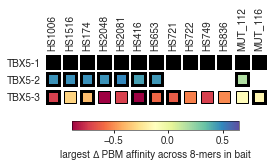

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
y1h_pdi_per_tf_gene_plot("TBX5", data=y1h, ax=ax, 
                         iso_order=["TBX5-1", "TBX5-2", "TBX5-3"], bait_colors=colors)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity across 8-mers in bait")
plt.savefig('../../../../figures/TBX5_y1h_with_pbm.pdf', bbox_inches='tight', dpi="figure")

In [35]:
sns.color_palette("Spectral_r", n_colors=4)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9019607843137255, 0.9607843137254902, 0.596078431372549),
 (0.996078431372549, 0.8784313725490197, 0.5450980392156864),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157)]